# Modelos de Regresion Lineal

#### Modelo con datos simulados
* y = a + b * x
* X: 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuida según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [49]:
x = 1.5 + 2.5 * np.random.randn(100)

In [67]:
res = 0 + 0.8 * np.random.randn(100)-0.4

In [68]:
y_pred = 5 + 1.9 * x

In [69]:
y_act = 5 + 1.9 * x + res

In [70]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [71]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [72]:
data.head()

,x,y_actual,y_prediccion
0,1.233209,7.280011,7.343096
1,1.446045,7.882388,7.747485
2,5.315966,14.835656,15.100335
3,2.995831,10.698130,10.692080
4,0.644047,6.273552,6.223689


In [73]:
import matplotlib.pyplot as plt

In [74]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccón')

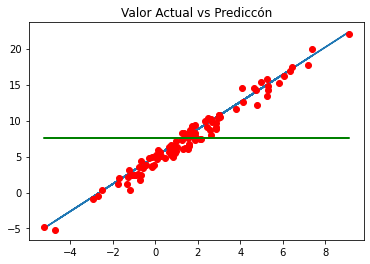

In [75]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Prediccón")

## ¿Cómo es la predicción de buena?
* SST = SSD + SSR 
* SST : Variabilidad de los datos con respecto a su media
* SSD : Diferencia entre los datos origniales y las predicciones que el modelo no es capaz de explicar (errores que deberian seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [76]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_act))**2

In [85]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.233209,7.280011,7.343096,0.041368,0.003980,0.071009
1,1.446045,7.882388,7.747485,0.040400,0.018199,0.112830
2,5.315966,14.835656,15.100335,57.060621,0.070055,53.131978
3,2.995831,10.698130,10.692080,9.894752,0.000037,9.932855
4,0.644047,6.273552,6.223689,1.749796,0.002486,1.620363


In [77]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [78]:
SSR

2283.9259295703264

In [79]:
SSD

82.04943751396384

In [80]:
SST

2420.2619017904362

In [81]:
SSD+SSR

2365.97536708429

In [82]:
R2 = SSR/SST

In [83]:
R2

0.9436689177649523

(array([ 1.,  0., 12., 15., 14., 21., 12., 14.,  8.,  3.]),
 array([-1.81492738, -1.40259695, -0.99026653, -0.5779361 , -0.16560568,
         0.24672475,  0.65905517,  1.0713856 ,  1.48371602,  1.89604645,
         2.30837687]),
 <BarContainer object of 10 artists>)

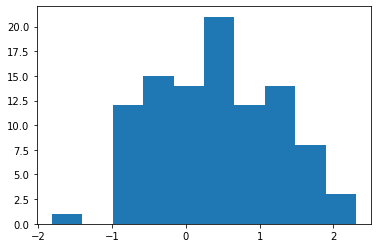

In [84]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniedno la recta de regresión
* b = sum(xi - x_m)*(y_i - y_m) / sum((xi - x_m)^2)
* a=y_n - b*x_m

In [86]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.549970011071514, 7.546487158934366)

In [87]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [88]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [89]:
alpha = y_mean - beta * x_mean

In [90]:
alpha, beta

(4.545684955836343, 1.9360388792448506)

El modelo lineal obtenido por regresión es: y = 4.545684955836343 + 1.9360388792448506 * x

In [91]:
data["y_model"] = alpha + beta * data["x"]

In [92]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.233209,7.280011,7.343096,0.041368,0.003980,0.071009,0.084409,0.100338,6.933225
1,1.446045,7.882388,7.747485,0.040400,0.018199,0.112830,-0.034909,0.010800,7.345284
2,5.315966,14.835656,15.100335,57.060621,0.070055,53.131978,27.450979,14.182725,14.837602
3,2.995831,10.698130,10.692080,9.894752,0.000037,9.932855,4.556839,2.090515,10.345731
4,0.644047,6.273552,6.223689,1.749796,0.002486,1.620363,1.153181,0.820697,5.792584


##  Error estándar de los residuos (RSE)

In [93]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.9150077367463914

In [94]:
np.mean(data["y_actual"])

7.546487158934366

In [95]:
RSE / np.mean(data["y_actual"])

0.12124949231022066